In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import umap


In [2]:
digits = load_digits()

reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 1.0, 'UMAP projection of the Digits dataset')

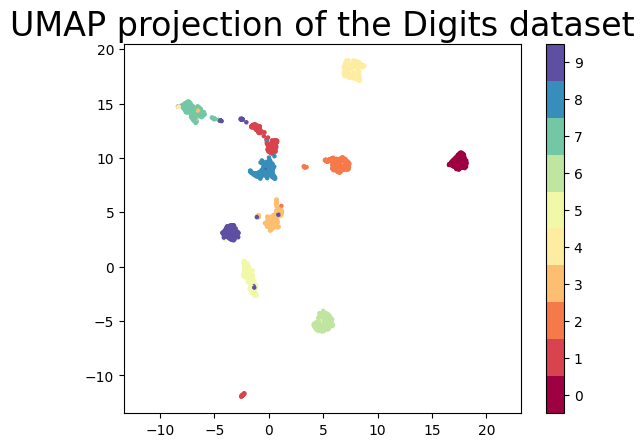

In [3]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap="Spectral", s=5)
plt.gca().set_aspect("equal", "datalim")
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title("UMAP projection of the Digits dataset", fontsize=24)


In [5]:
import polars as pl
from pathlib import Path


In [6]:
def select_cols(num_cols: int) -> list[pl.Expr]:
    return list(map(lambda i: pl.col(f"column_{i}"), range(num_cols)))


In [7]:
data_path = Path("/home/shinsei/MyResearches/feat_extrc/reports/features/SimpleCAE32/2023-07-10/13-09-32/feature_train_data_clustering.csv")
df = pl.read_csv(data_path)
n_lf = 128
X = df.select(select_cols(n_lf))
sample_nums = df.select(["dirname"]).to_numpy().flatten()
local_structure_clusters = df.select(["cluster"]).to_numpy().flatten()


In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)


In [17]:
reducer = umap.UMAP(
    n_components=3,
    random_state=42,
    n_jobs=1,
    metric="manhattan"
)
X_std_emb = reducer.fit_transform(X_std)


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value 2 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


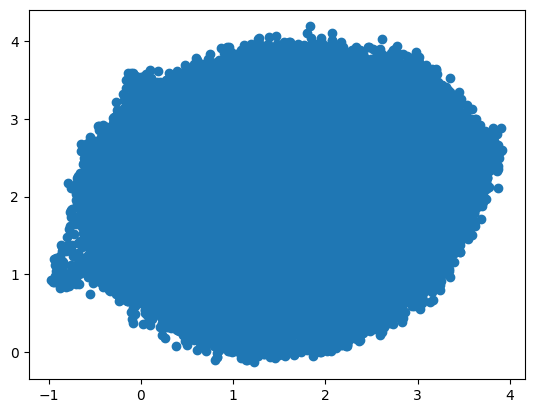

In [18]:
plt.scatter(X_std_emb[:, 0], X_std_emb[:, 1])


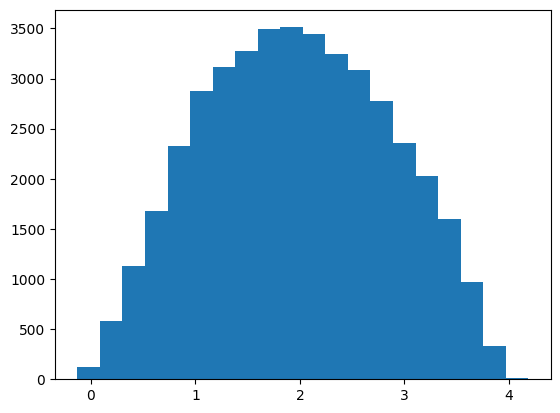

In [20]:
plt.hist(X_std_emb[:, 1], bins=20)
plt.show()
